In [1]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/abhiram/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/abhiram/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
df = pd.read_csv('../../datasets/detect_sarcasm_in_comments/Train.csv')
df

,ID,comment,date,down,parent_comment,score,top,topic,user,label
0,uid_590555,"Well, let's be honest here, they don't actuall...",2015-04,0,They should shut the fuck up and let the commu...,2,2,starcitizen,Combat_Wombatz,0
1,uid_671762,"Well, I didn't need evidence to believe in com...",2016-12,-1,You need evidence to kill people? I thought we...,6,-1,EnoughCommieSpam,starkadd,1
2,uid_519689,"Who does an ""official promo"" in 360p?",2013-11,0,2014 BMW S1000R: Official Promo,3,3,motorcycles,phybere,0
3,uid_788362,Grotto koth was the best,2015-09,0,Not really that memorable lol if you want memo...,2,2,hcfactions,m0xyMC,1
4,uid_299252,Neal's back baby,2015-11,0,James Neal hit on Zach Parise,-5,-5,hockey,Somuch101,1
...,...,...,...,...,...,...,...,...,...,...
14995,uid_845344,Well with a name like El Cubano I'm surprised ...,2015-01,0,There's two things you don't do in Florida. - ...,18,18,hockey,shutupisaac,0
14996,uid_757880,... This is a good point.,2014-04,0,Sounds like a pretty good overall summary of o...,6,6,hockey,em483,0
14997,uid_724706,Yep.,2015-09,0,"I know the type you speak of. The ""die cis scu...",2,2,AskReddit,YoImAli,0
14998,uid_1006984,That's what the government WANTS you to believe!,2016-01,0,That there's A hidden cure for cancer but phar...,1,1,AskReddit,OhHiGCHQ,1


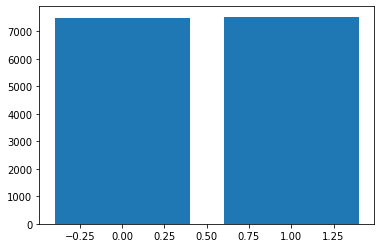

In [3]:
# Check the frequency of each label
label1 = len(df[df['label'] == 1])
label0 = len(df[df['label'] == 0])
plt.bar(x=[1, 0], height=[label1, label0])
plt.show()

In [4]:
df = df.drop(columns=['ID', 'date', 'down', 'top', 'user'])
df

,comment,parent_comment,score,topic,label
0,"Well, let's be honest here, they don't actuall...",They should shut the fuck up and let the commu...,2,starcitizen,0
1,"Well, I didn't need evidence to believe in com...",You need evidence to kill people? I thought we...,6,EnoughCommieSpam,1
2,"Who does an ""official promo"" in 360p?",2014 BMW S1000R: Official Promo,3,motorcycles,0
3,Grotto koth was the best,Not really that memorable lol if you want memo...,2,hcfactions,1
4,Neal's back baby,James Neal hit on Zach Parise,-5,hockey,1
...,...,...,...,...,...
14995,Well with a name like El Cubano I'm surprised ...,There's two things you don't do in Florida. - ...,18,hockey,0
14996,... This is a good point.,Sounds like a pretty good overall summary of o...,6,hockey,0
14997,Yep.,"I know the type you speak of. The ""die cis scu...",2,AskReddit,0
14998,That's what the government WANTS you to believe!,That there's A hidden cure for cancer but phar...,1,AskReddit,1


In [5]:
text = df['comment'][0]
print('Original: ', text)

def clean_string(text):
    stemmer = WordNetLemmatizer()
    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = ''.join([i for i in nopunc if not i.isdigit()])
    nopunc =  [word.lower() for word in nopunc.split() if word not in stopwords.words('english')]
    nopunc = [stemmer.lemmatize(word) for word in nopunc]
    return nopunc

print('Modified: ', ' '.join(clean_string(text), ))

Original:  Well, let's be honest here, they don't actually seem to do much moderating, so they have to spend their time doing *something*.
Modified:  well let honest dont actually seem much moderating spend time something


In [6]:
tfidfconvert = TfidfVectorizer(analyzer=clean_string, ngram_range=(1, 3)).fit(df['comment'].values)

len(tfidfconvert.vocabulary_)

15720

In [7]:
Xtrain = tfidfconvert.transform(df['comment'].values)


In [8]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=60, init='k-means++', n_init=100)
model.fit(Xtrain)

KMeans(n_clusters=60, n_init=100)

In [9]:
ssqd = []
for k in range(10, 300, 10):
    print('Running with K=', k)
    model = KMeans(n_clusters=k)
    model = model.fit(Xtrain)
    ssqd.append(model.inertia_)

Initialization complete
Iteration 0, inertia 25455.062573147898
Iteration 1, inertia 14078.123905548795
Iteration 2, inertia 13942.535884638959
Iteration 3, inertia 13878.262098779334
Iteration 4, inertia 13848.057036359261
Iteration 5, inertia 13829.028947619918
Iteration 6, inertia 13821.098867796505
Iteration 7, inertia 13815.03504435966
Iteration 8, inertia 13809.189032293054
Iteration 9, inertia 13802.647973148203
Iteration 10, inertia 13799.175462217228
Iteration 11, inertia 13796.51666771563
Iteration 12, inertia 13796.371688900137
Iteration 13, inertia 13796.26840592227
Iteration 14, inertia 13796.22547159495
Iteration 15, inertia 13796.147717867932
Iteration 16, inertia 13795.985401144253
Iteration 17, inertia 13795.945733386072
Iteration 18, inertia 13795.919331588173
Iteration 19, inertia 13795.889307739442
Iteration 20, inertia 13795.84371510555
Iteration 21, inertia 13795.825817483214
Iteration 22, inertia 13795.8009649347
Iteration 23, inertia 13795.780754382511
Iteration

KeyboardInterrupt: 

In [ ]:
plt.plot(range(10, 300, 10), ssqd, 'rx-')
plt.xlabel('k')
plt.ylabel('Final Loss')
plt.show()